In [1]:
import numpy as np
np.__version__

'1.19.5'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 理解Python数据类型

## 1.1 Python整形不仅仅是一个数值

python3.4中的一个整形实际包括4个部分：
- ob_refcnt是一个引用计数
- ob_type是变量类型编码
- ob_size 指定数据大小（长度）
- ob_digit 包含实际整形值

> 每一个Python对象都是一个C语言结构体

## 1.2 Python列表不仅仅是一个列表
Python列表可以存储可变多元素，为了获得这些灵活的类型，列表中的每一项都是一个完整的python对象，这样不利于存储和操作数据。Numpy式数组与之相反。![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png)


## 1.3 python也可以创建紧凑数组
但是Numpy在紧凑存储的基础上提供了高效操作

In [3]:
import array
L=list(range(10))
A=array.array('i',L)
L
A

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
import sys
print("python数组的内存大小：%d" %sys.getsizeof(L))
print("紧凑型python数组的内存大小: %d" %sys.getsizeof(A))

python数组的内存大小：208
紧凑型python数组的内存大小: 104


In [5]:
X=np.array(L)
print("numpy数组大小： %d" %sys.getsizeof(X))
F=np.array(L,dtype="float")
print("设定数据类型为float的numpy数组大小： %d" %sys.getsizeof(X))

numpy数组大小： 176
设定数据类型为float的numpy数组大小： 176


In [6]:
#从python列表创建的嵌套列表构成的Numpy多维数组
i=1
np.array([range(i,i+3) for i in [1,2,3]])

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

## 1.4 从头创建数组

In [7]:
# 创建一个长度为10的数组，数组的值都是0
np.zeros(10,dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# 创建一个3*5的浮点型数组，数组的值都是1
np.ones((3,5),dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [9]:
# 创建一个3*5的浮点型数组，数组的值都是3.14
np.full((3,5),3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [10]:
# 数组的值是线性序列，从0开始到20，步长2
np.arange(0,22,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [11]:
# 创建一个5个元素的数组，数组的值从0到1均匀分配
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [12]:
# 创建一个3*3的,在0-1均匀分布的随机数组
np.random.random((3,3))
np.random.rand(3,3)

array([[0.92774263, 0.04784321, 0.71743306],
       [0.8261466 , 0.43843811, 0.34198388],
       [0.26131355, 0.07435751, 0.59102251]])

array([[0.39220854, 0.42797376, 0.32446006],
       [0.85334985, 0.19962996, 0.56655034],
       [0.81207538, 0.08410808, 0.77371172]])

In [13]:
# 创建一个3*3的,均值为0，方差为1的正态分布的随机数组
np.random.normal(0,1,(3,3))

array([[ 1.17467859,  0.57677167,  0.48404983],
       [ 0.01558174,  0.55291844,  1.5572472 ],
       [ 0.69983403, -0.14569988,  0.65940795]])

In [14]:
# 创建一个3*3的[0,10）区间的随机整数类型
np.random.randint(0,10,(3,3))

array([[7, 4, 4],
       [9, 6, 3],
       [0, 3, 8]])

In [15]:
# 创建一个3*3的单位矩阵
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
# 创建一个由3个整数组成的未初始化的数组
np.empty(3)

array([1., 1., 1.])


|Data type|　　Description|  
|--- |---| 
|bool_|Boolean (True or False) stored as a byte  |
|int_　　　|Default integer type (same as C long; normally either int64 or int32)  |
|intc|Identical to C int (normally int32 or int64)  |
|intp　|Integer used for indexing (same as C ssize_t; normally either int32 or int64)  |
|int8	　　|Byte (-128 to 127)  
|int16	　　|Integer (-32768 to 32767)  
|int32	　　|Integer (-2147483648 to 2147483647)  |
|int64	　　|Integer (-9223372036854775808 to 9223372036854775807) | 
|uint8	　　|Unsigned integer (0 to 255)  |
|uint16　　	|Unsigned integer (0 to 65535)  |
|uint32　　	|Unsigned integer (0 to 4294967295)  |
|uint64　　	|Unsigned integer (0 to 18446744073709551615)|  
|float_	　　|Shorthand for float64.  |
|float16	|Half precision float: sign bit, 5 bits exponent, 10 bits mantissa  |
|float32|Single precision float: sign bit, 8 bits exponent, 23 bits mantissa  |
|float64|Double precision float: sign bit, 11 bits exponent, 52 bits mantissa|  
|complex_　	|Shorthand for complex128.  |
|complex64　|Complex number, represented by two 32-bit floats  |
|complex128　|Complex number, represented by two 64-bit floats  |

## Numpy数组基础

### Numpy数组的属性

In [17]:
np.random.seed(0)

x1=np.random.randint(10,size=6)
x2=np.random.randint(10,size=(3,4))
x3=np.random.randint(10,size=(3,4,5))

In [18]:
#数组的维度、每个维度的大小、数组的元素数量、数组元素的数据类型、
print("x3的维度：",x3.ndim)
print("x3每个维度的大小:",x3.shape)
print("x3数组的大小:",x3.size)
print("X3元素的数据类型：",x3.dtype)
print("X3元素的字节大小：",x3.itemsize)
print("x3 数组总字节大小：",x3.nbytes)

x3的维度： 3
x3每个维度的大小: (3, 4, 5)
x3数组的大小: 60
X3元素的数据类型： int64
X3元素的字节大小： 8
x3 数组总字节大小： 480


In [19]:
x2.size

12

### 数组索引：获取单个元素

In [20]:
x1
x1[-1]
x1[0]

array([5, 0, 3, 3, 7, 9])

9

5

In [21]:
x2
x2[0,0]

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

3

### 数组切片


In [22]:
x=np.arange(10)
x
x[:5]
x[5:]
x[4:5]
x[::2]
x[::-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4])

array([5, 6, 7, 8, 9])

array([4])

array([0, 2, 4, 6, 8])

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [23]:
x2
x2[:2,]
x2[:2,:3]

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

array([[3, 5, 2, 4],
       [7, 6, 8, 8]])

array([[3, 5, 2],
       [7, 6, 8]])

In [24]:
x2[0]

array([3, 5, 2, 4])

In [25]:
#numpy返回的是数组的视图而不是副本
x2_sub_1=x2
x2_sub_1[0]=[4,3,2,1]
x2

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [26]:
#如果要创建副本
x2_sub_2=x2.copy()
x2_sub_2[0]=[4,3,2,1]
x2

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

### 数组变形
reshape
newaxis

In [27]:
x2
x2.shape
x2.reshape((4,3))#
x2

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

(3, 4)

array([[4, 3, 2],
       [1, 7, 6],
       [8, 8, 1],
       [6, 7, 7]])

array([[4, 3, 2, 1],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [28]:
x=np.array([1,2,3])
x
x.reshape((1,3))
x[np.newaxis,:]

array([1, 2, 3])

array([[1, 2, 3]])

array([[1, 2, 3]])

### 数组拼接和分裂
拼接：concatenate vstack hstack
分裂：split hsplit vsplit 

In [29]:
x=np.array([1,2,3])
y=np.array([4,5,6])
z=np.array([7,8,9])
x
y
np.concatenate([x,y,z])

array([1, 2, 3])

array([4, 5, 6])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
y=x=np.arange(1,7).reshape(2,3)
np.concatenate([x,y])
np.concatenate([x,y],axis=1)
np.vstack([x,y])
np.hstack([x,y])
np.dstack([x,y])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[4, 4],
        [5, 5],
        [6, 6]]])

In [31]:
#数组分裂
x=np.random.randint(1,999,16)
x1,x2,x3=np.split(x,[3,5])
x
x1,x2,x3

array([ 48, 640, 132, 973, 869, 181, 847, 144, 661, 228, 955, 792, 720,
       910, 374, 854])

(array([ 48, 640, 132]),
 array([973, 869]),
 array([181, 847, 144, 661, 228, 955, 792, 720, 910, 374, 854]))

In [32]:
x=x.reshape((4,4))
upper,lower=np.vsplit(x,[2])
left,right=np.hsplit(x,[2])
x
print("vsplit:",(upper,lower))
print("hsplit:",(left,right))

array([[ 48, 640, 132, 973],
       [869, 181, 847, 144],
       [661, 228, 955, 792],
       [720, 910, 374, 854]])

vsplit: (array([[ 48, 640, 132, 973],
       [869, 181, 847, 144]]), array([[661, 228, 955, 792],
       [720, 910, 374, 854]]))
hsplit: (array([[ 48, 640],
       [869, 181],
       [661, 228],
       [720, 910]]), array([[132, 973],
       [847, 144],
       [955, 792],
       [374, 854]]))


## Numpy的通用函数
Numpy数组计算更快的关键是利用向量化操作，通常在Numpy的通用函数中实现（ufunc）

### 缓慢的循环

In [33]:
def compute_reciprocals(values):
    output=np.empty(len(values))
    for i in range(len(values)):
        output[i]=1.0/values[i]
    return output
values=np.random.randint(1,10,size=5)


In [34]:
big_array=np.random.randint(1,100,size=1000000)
%timeit compute_reciprocals(big_array)

6.81 s ± 417 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 通用函数介绍

In [35]:
%timeit (1.0/big_array)

3.53 ms ± 369 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 探索通用函数
更加专用的通用函数可以采用scipy.special库包含的函数

In [36]:
#数组的算术运算
np.add
np.subtract
np.negative
np.multiply
np.divide
np.floor_divide
np.power
np.mod
np.abs

<ufunc 'add'>

<ufunc 'subtract'>

<ufunc 'negative'>

<ufunc 'multiply'>

<ufunc 'true_divide'>

<ufunc 'floor_divide'>

<ufunc 'power'>

<ufunc 'remainder'>

<ufunc 'absolute'>

In [37]:
#三角函数
theta=np.linspace(0,np.pi,3)
print("theta=",theta)
print("sin(theta)=",np.sin(theta))
print("cos(theta)=",np.cos(theta))
print("tan(theta)=",np.tan(theta))

theta= [0.         1.57079633 3.14159265]
sin(theta)= [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta)= [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta)= [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [38]:
#逆三角函数
x=[-1,0,1]
print("x=",x)
print("arcsin(x)=",np.arcsin(x))
print("arccos(x)=",np.arccos(x))
print("arctan(x)=",np.arctan(x))


x= [-1, 0, 1]
arcsin(x)= [-1.57079633  0.          1.57079633]
arccos(x)= [3.14159265 1.57079633 0.        ]
arctan(x)= [-0.78539816  0.          0.78539816]


In [39]:
#指数和对数
x=[1,2,3]
print("x=",x)
print("e^x=",np.exp(x))
print("2^x=",np.exp2(x))
print("3^x=",np.power(3,x))

x=[1,2,4,10]
print("x=",x)
print("ln(x)=",np.log(x))
print("log2(x)=",np.log2(x))
print("log10(x)=",np.log10(x))

x= [1, 2, 3]
e^x= [ 2.71828183  7.3890561  20.08553692]
2^x= [2. 4. 8.]
3^x= [ 3  9 27]
x= [1, 2, 4, 10]
ln(x)= [0.         0.69314718 1.38629436 2.30258509]
log2(x)= [0.         1.         2.         3.32192809]
log10(x)= [0.         0.30103    0.60205999 1.        ]


In [40]:
#特殊版本的函数，对非常小的输入值保持较好的精度
x=[0,0.001,0.01,0.1]
print("exp(x)-1=",np.expm1(x))
print("log(1+x)=",np.log1p(x))

exp(x)-1= [0.         0.0010005  0.01005017 0.10517092]
log(1+x)= [0.         0.0009995  0.00995033 0.09531018]


### 高级的通用函数特性

In [41]:
# 指定存储输出的变量，比起输出结果存储在临时变量中再赋值给结果变量更节省内存
x=np.arange(5)
y=np.empty(5)
np.multiply(x,10,out=y)
print(y)

array([ 0., 10., 20., 30., 40.])

[ 0. 10. 20. 30. 40.]


In [42]:
#聚合
x=np.arange(1,6)
np.add.reduce(x)
np.multiply.reduce(x)
np.add.accumulate(x)
np.multiply.accumulate(x)

15

120

array([ 1,  3,  6, 10, 15])

array([  1,   2,   6,  24, 120])

In [43]:
#外积
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## 4 聚合：最小值、最大值、其他值

### 数组值求和

In [44]:
L=np.random.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

578 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.59 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 最小值和最大值

In [45]:
big_array.min()
big_array.max()
big_array.sum()

1

99

49989047

In [46]:
#按维度聚合
M=np.random.random((3,4))
M
M.min(axis=0)
M.min(axis=1)

array([[0.78094553, 0.24695578, 0.55846899, 0.36822725],
       [0.47507029, 0.2898924 , 0.25126433, 0.56789633],
       [0.5527829 , 0.03901305, 0.53291053, 0.61521127]])

array([0.47507029, 0.03901305, 0.25126433, 0.36822725])

array([0.24695578, 0.25126433, 0.03901305])

其他聚合函数  

|Function Name|NaN-safe Version|Description|
| ---|---|---|  
|np.sum	|np.nansum|	Compute sum of elements|  
|np.prod|	np.nanprod|	Compute product of elements  |
|np.mean|	np.nanmean	|Compute mean of elements  |
|np.std	|np.nanstd	|Compute standard deviation | 
|np.var|	np.nanvar|	Compute variance  |
|np.min|	np.nanmin	|Find minimum value  |
|np.max|	np.nanmax|	Find maximum value | 
|np.argmin|	np.nanargmin|	Find index of minimum value  |
|np.argmax|	np.nanargmax|	Find index of maximum value  |
|np.median|	np.nanmedian|	Compute median of elements  |
|np.percentile	|np.nanpercentile|	Compute rank-based statistics of elements  |
|np.any|	N/A	|Evaluate whether any elements are true  |
|np.all|	N/A	|Evaluate whether all elements are true  |

### 美国总统的身高

In [55]:
import pandas as pd
pd.__version__
data=pd.read_csv('data/president_heights.csv')
heights=np.array(data['height(cm)'])
print("平均身高：",heights.mean())
print("身高标准差：",heights.std())
print("最矮:",heights.min())
print("最高：",heights.max())
print("25%位数：",np.percentile(heights,25))
print("中位数：",np.median(heights))
print("75%位数：",np.percentile(heights,75))

'1.2.1'

平均身高： 179.73809523809524
身高标准差： 6.931843442745892
最矮: 163
最高： 193
25%位数： 174.25
中位数： 182.0
75%位数： 183.0


(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, '美国总统身高分布')

Text(0.5, 0, '身高（厘米）')

Text(0, 0.5, '人数')

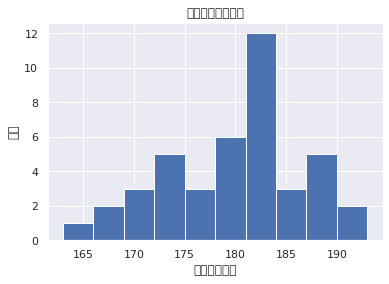

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import warnings
warnings.filterwarnings("ignore")
plt.hist(heights)
plt.title("美国总统身高分布")
plt.xlabel("身高（厘米）")
plt.ylabel("人数")

## 数组广播
### 广播的介绍

In [60]:
a=np.arange(3)
b=np.arange(3)[:,np.newaxis]
a
b
a+b


array([0, 1, 2])

array([[0],
       [1],
       [2]])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 广播的规则
- 如果维度数不等，小维度数组会在最左边补1
- 如果在任何一个维度都不等，数组的形状会沿着维度为1的维度扩展以匹配另一个数组
- 如果两个数组的形状在任一维度都不匹配且没有维度等于1，则引发异常

In [62]:
M=np.ones((2,3))
a=np.arange(3)
M
a
M+a

array([[1., 1., 1.],
       [1., 1., 1.]])

array([0, 1, 2])

array([[1., 2., 3.],
       [1., 2., 3.]])

In [64]:
a=np.arange(3).reshape((3,1))
b=np.arange(3)
a
b
a+b

array([[0],
       [1],
       [2]])

array([0, 1, 2])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [66]:
m=np.ones((3,2))
a=np.arange(3)
m+a


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [67]:
m+a[:,np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

### 广播的实际应用


In [71]:
#数组的归一化
X=np.random.random((10,3))
Xmean=X.mean(0)
X_centered=X-Xmean
X_centered.mean(0)

array([ 1.22124533e-16, -5.55111512e-17,  7.77156117e-17])

In [ ]:
#画一个二维数组
x=np.linspace(0,5,50)
y=np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x)**10+np.cos(10+y*x)*np.cosx(x)

plt.imshow(z,origin='lower')